## Importamos nuestros datos y paqueterías relevantes.

In [8]:
import pandas as pd
import numpy as np
from scipy import stats
import seaborn as sns
import matplotlib.pyplot as plt
from scipy.stats import skew, kurtosis



In [123]:
df = pd.read_csv('heart.csv')
df.head(10)

,Age,Sex,ChestPainType,RestingBP,Cholesterol,FastingBS,RestingECG,MaxHR,ExerciseAngina,Oldpeak,ST_Slope,HeartDisease
0,40,M,ATA,140,289,0,Normal,172,N,0.0,Up,0
1,49,F,NAP,160,180,0,Normal,156,N,1.0,Flat,1
2,37,M,ATA,130,283,0,ST,98,N,0.0,Up,0
3,48,F,ASY,138,214,0,Normal,108,Y,1.5,Flat,1
4,54,M,NAP,150,195,0,Normal,122,N,0.0,Up,0
5,39,M,NAP,120,339,0,Normal,170,N,0.0,Up,0
6,45,F,ATA,130,237,0,Normal,170,N,0.0,Up,0
7,54,M,ATA,110,208,0,Normal,142,N,0.0,Up,0
8,37,M,ASY,140,207,0,Normal,130,Y,1.5,Flat,1
9,48,F,ATA,120,284,0,Normal,120,N,0.0,Up,0


## 1. Limpieza de datos

Antes de comenzar nuestro análisis realizaremos una pequeña limpieza de datos para estar seguros de que no hay ningún tipo de inconsistencias con la información.


In [41]:
# vemos que nuestros datos no tienen valores nulos, aunque quizá haya que modifica el tipo de datos para algunos campos
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 918 entries, 0 to 917
Data columns (total 12 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   Age             918 non-null    int64  
 1   Sex             918 non-null    object 
 2   ChestPainType   918 non-null    object 
 3   RestingBP       918 non-null    int64  
 4   Cholesterol     918 non-null    int64  
 5   FastingBS       918 non-null    int64  
 6   RestingECG      918 non-null    object 
 7   MaxHR           918 non-null    int64  
 8   ExerciseAngina  918 non-null    object 
 9   Oldpeak         918 non-null    float64
 10  ST_Slope        918 non-null    object 
 11  HeartDisease    918 non-null    int64  
dtypes: float64(1), int64(6), object(5)
memory usage: 86.2+ KB


In [42]:
df.dtypes

Age                 int64
Sex                object
ChestPainType      object
RestingBP           int64
Cholesterol         int64
FastingBS           int64
RestingECG         object
MaxHR               int64
ExerciseAngina     object
Oldpeak           float64
ST_Slope           object
HeartDisease        int64
dtype: object

In [43]:
df.dtypes
df.shape

(918, 12)

Vemos que nuestros datos no tienen valores nulos, pero hay algunas variables como HeartDisease y FastingBS que nos serían más útiles si fueran booleandas. Por lo que convertiremos estas dos variables a dicho tipo.

In [124]:
# creamos un diccionario de conversión de tipos de datos
diccionario_conversion={'HeartDisease':'bool',
                        'FastingBS':'bool',
}

In [125]:
df = df.astype(diccionario_conversion)
df.dtypes

Age                 int64
Sex                object
ChestPainType      object
RestingBP           int64
Cholesterol         int64
FastingBS            bool
RestingECG         object
MaxHR               int64
ExerciseAngina     object
Oldpeak           float64
ST_Slope           object
HeartDisease         bool
dtype: object

In [18]:
# Veamos si tenemos valores duplicados

df = df.drop_duplicates()
df.shape # no tenemos valores duplicados porque el tamaño de nuestrs datos es el mismo

(918, 12)

In [19]:
# Una manera alternativa de verificar si tenemos valores faltantes es de la siguiente manera
var_nulos = df.isnull().count()
var_nulos[var_nulos<0]

Series([], dtype: int64)

# 2. Análisis exploratorio.



Como parte del análisis exploratorio de los datos, se hace analizan las variables categóricas y numéricas usando diferentes métodos. El objetivo es encontrar información relevante que nos ayude a entender si existe correlacion entre las variables numéricas y cómo afectan las variables categóricas.

### Medidas de tendencia central

In [23]:
# media
df['Age'].mean()

53.510893246187365

In [24]:
# mediana
df['Age'].median()

54.0

In [25]:
# media truncada 
stats.trim_mean(df['Age'],0.1) # quitamos el 10% de los datos

53.71059782608695

In [26]:
df['Age'].std()

9.43261650673201

In [27]:
# rango
df['Age'].max()-df['Age'].min()

49

In [28]:
# percentil 90
df['Age'].quantile(0.8)

62.0

In [29]:
df['Age'].quantile(0.75)

60.0

In [30]:
df['Age'].quantile(0.25)

47.0

In [31]:
iqr= df['Age'].quantile(0.75) - df['Age'].quantile(0.25)
iqr

13.0

### Boxplots
En esta parte se usan boxplots, tablas de frecuencia, histogramas y gráficos de densidad para analizar la distribución de los datos.


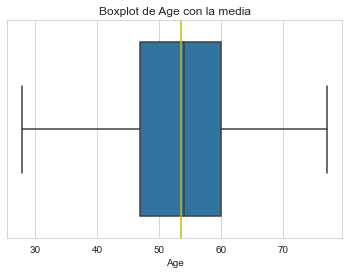

In [46]:
sns.set_style('whitegrid')
ax= sns.boxplot(x=df['Age'])
plt.axvline(df['Age'].mean(),c='y')
ax.set_title('Boxplot de Age con la media');

In [47]:
# Quitamos los valores que se encuentren fueran del rango intercuantilico y obtenemos lo siguiente
IQR = df['Age'].quantile(0.75)-df['Age'].quantile(0.25)
filtro_sup = df['Age'] < df['Age'].quantile(0.75) + 1.5 * IQR
filtro_inf = df['Age'] > df['Age'].quantile(0.25) - 1.5 * IQR

df_filtrado = df[filtro_sup & filtro_inf]

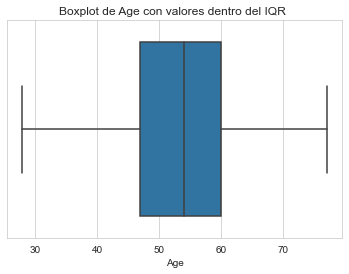

In [48]:
ax = sns.boxplot(x=df_filtrado['Age'])
ax.set_title('Boxplot de Age con valores dentro del IQR ');

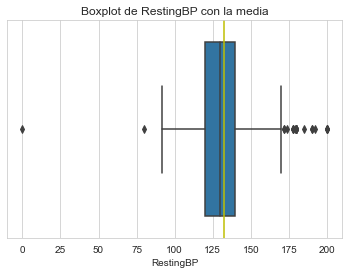

In [49]:
sns.set_style('whitegrid')
ax = sns.boxplot(x=df['RestingBP'])
plt.axvline(df['RestingBP'].mean(),c='y')
ax.set_title('Boxplot de RestingBP con la media');

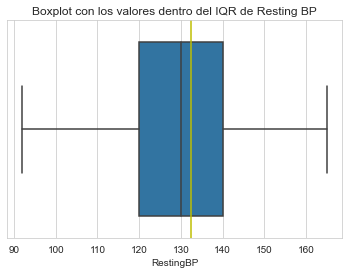

In [50]:
# Quitamos los valores que se encuentren fueran del rango intercuantilico y obtenemos lo siguiente

IQR = df['RestingBP'].quantile(0.75)-df['RestingBP'].quantile(0.25)
filtro_sup = df['RestingBP'] < df['RestingBP'].quantile(0.75) + 1.5 * IQR
filtro_inf = df['RestingBP'] > df['RestingBP'].quantile(0.25) - 1.5 * IQR

df_filtrado = df[filtro_sup & filtro_inf]
ax= sns.boxplot(x=df_filtrado['RestingBP'])
plt.axvline(df['RestingBP'].mean(),c='y')
ax.set_title('Boxplot con los valores dentro del IQR de Resting BP');

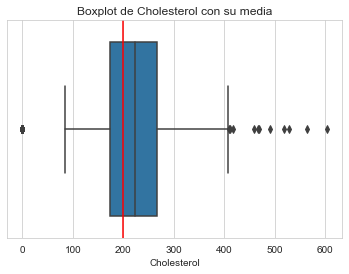

In [51]:
sns.set_style('whitegrid')
ax= sns.boxplot(x=df['Cholesterol'])
plt.axvline(df['Cholesterol'].mean(),c='r')
ax.set_title('Boxplot de Cholesterol con su media');

Text(0.5, 1.0, 'Boxplot de Cholesterol')

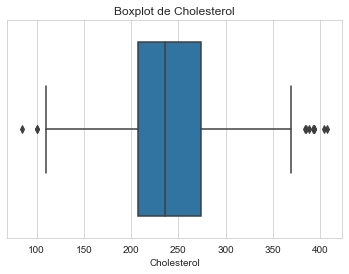

In [52]:
# Quitamos los valores que se encuentren fueran del rango intercuantilico y obtenemos lo siguiente

IQR = df['Cholesterol'].quantile(0.75)-df['Cholesterol'].quantile(0.25)
filtro_sup = df['Cholesterol'] < df['Cholesterol'].quantile(0.75) + 1.5 * IQR
filtro_inf = df['Cholesterol'] > df['Cholesterol'].quantile(0.25) - 1.5 * IQR

df_filtrado = df[filtro_sup & filtro_inf]

ax= sns.boxplot(x=df_filtrado['Cholesterol'])
ax.set_title('Boxplot de Cholesterol')

### Histogramas y tablas de frecuencia

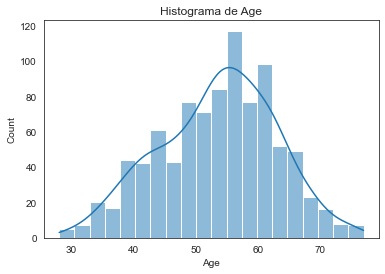

In [53]:
sns.set_style('white')
ax= sns.histplot(df['Age'],kde=True,bins=20)
ax.set_title('Histograma de Age');


In [54]:
age_arr=np.array(df['Age']) 
print(f'Curtosis: {kurtosis(age_arr)}')
print(f'Asimetría: {skew(age_arr)}')

Curtosis: -0.3905684960842244
Asimetría: -0.19561273124487544


Text(0.5, 1.0, 'Histograma de RestingBP')

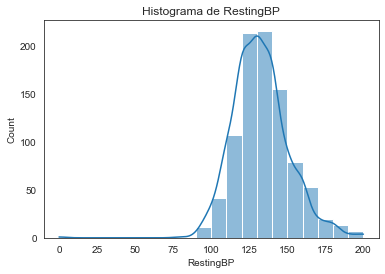

In [55]:
ax= sns.histplot(df['RestingBP'],kde=True,bins=20)
ax.set_title('Histograma de RestingBP')

In [56]:
restingBP_arr=np.array(df['RestingBP']) 
print(f'Curtosis: {kurtosis(restingBP_arr)}')
print(f'Asimetría: {skew(restingBP_arr)}')

Curtosis: 3.2469319615478724
Asimetría: 0.17954532149156327


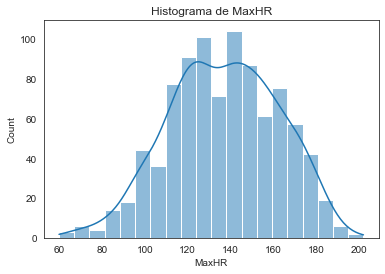

In [57]:
ax = sns.histplot(df['MaxHR'],kde=True,bins=20)
ax.set_title('Histograma de MaxHR');

In [58]:
MaxHR_arr=np.array(df['MaxHR']) 
print(f'Curtosis: {kurtosis(MaxHR_arr)}')
print(f'Asimetría: {skew(MaxHR_arr)}')

Curtosis: -0.4523389391469048
Asimetría: -0.14412342991429325


### Gráficas de barras, boxplots con variables categóricas y violin plots.

In [59]:
# Recordemos que tipo de variables tenemos
df.dtypes

Age                 int64
Sex                object
ChestPainType      object
RestingBP           int64
Cholesterol         int64
FastingBS            bool
RestingECG         object
MaxHR               int64
ExerciseAngina     object
Oldpeak           float64
ST_Slope           object
HeartDisease         bool
dtype: object

Las variables categóricas son: 'Sex', 'ChestPainType', 'RestingECG', 'ExerciseAngina', 'ST_Slope', 'HeartDisease'

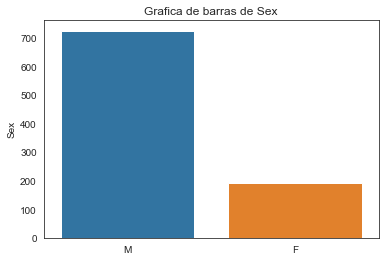

In [60]:
count1= df['Sex'].value_counts()
ax=sns.barplot(x=count1.index,y=count1)
ax.set_title('Grafica de barras de Sex');

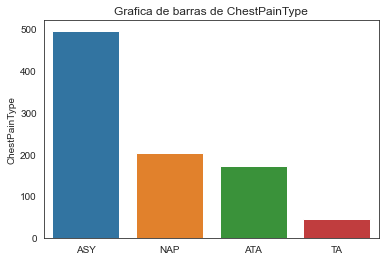

In [61]:
count2= df['ChestPainType'].value_counts()
ax=sns.barplot(x=count2.index,y=count2)
ax.set_title('Grafica de barras de ChestPainType');

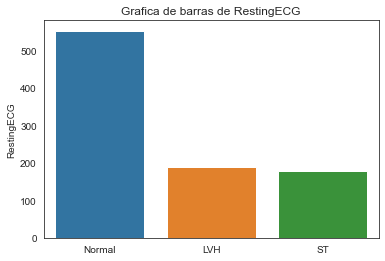

In [62]:
count3= df['RestingECG'].value_counts()
ax=sns.barplot(x=count3.index,y=count3)
ax.set_title('Grafica de barras de RestingECG');

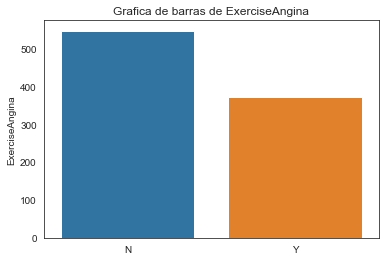

In [63]:
count4= df['ExerciseAngina'].value_counts()
ax=sns.barplot(x=count4.index,y=count4)
ax.set_title('Grafica de barras de ExerciseAngina');

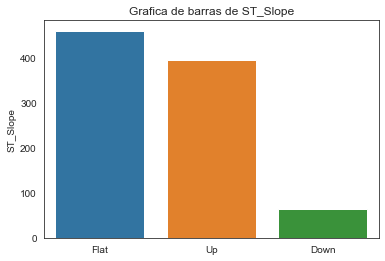

In [64]:
count5= df['ST_Slope'].value_counts()
ax=sns.barplot(x=count5.index,y=count5)
ax.set_title('Grafica de barras de ST_Slope');

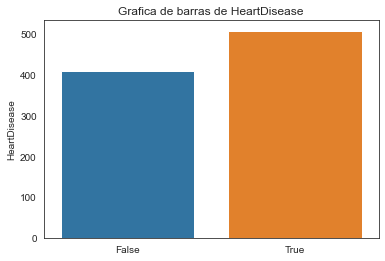

In [65]:
count6= df['HeartDisease'].value_counts()
ax=sns.barplot(x=count6.index,y=count6)
ax.set_title('Grafica de barras de HeartDisease');

In [66]:
cross1= pd.crosstab(df['HeartDisease'],[df['ChestPainType'],df['ST_Slope']])
cross1

ChestPainType  ASY           ATA            NAP            TA         
ST_Slope      Down Flat  Up Down Flat   Up Down Flat  Up Down Flat  Up
HeartDisease                                                          
False            4   29  71    2   14  133    5   29  97    3    7  16
True            42  289  61    1   18    5    5   59   8    1   15   4

In [67]:
cross2= pd.crosstab(df['Sex'],[df['RestingECG'],df['ExerciseAngina']])
cross2

RestingECG     LVH     Normal       ST    
ExerciseAngina   N   Y      N    Y   N   Y
Sex                                       
F               36  11     93   25  21   7
M               79  62    252  182  66  84

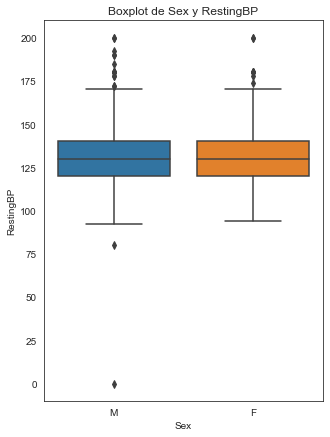

In [70]:
plt.figure(figsize=(5,7))
ax=sns.boxplot(data=df, x='Sex', y='RestingBP')
ax.set_title('Boxplot de Sex y RestingBP');

La presion arterial pafece no depender del sexo, ambas graficas son muy parecidas.

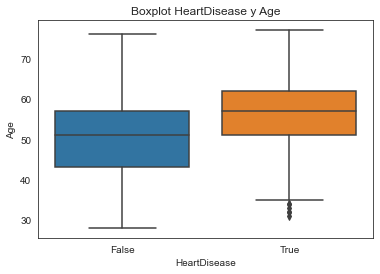

In [73]:
ax=sns.boxplot(data=df,x='HeartDisease',y='Age')
ax.set_title('Boxplot HeartDisease y Age');

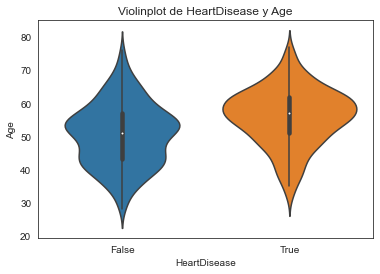

In [72]:
ax=sns.violinplot(data=df,x='HeartDisease',y='Age')
ax.set_title('Violinplot de HeartDisease y Age');

Vemos que las personas que murieron por una insuficiencia cardiaca tienen en general una edad más avanzada, al rededor de los 60 años se concentra la mayoria.

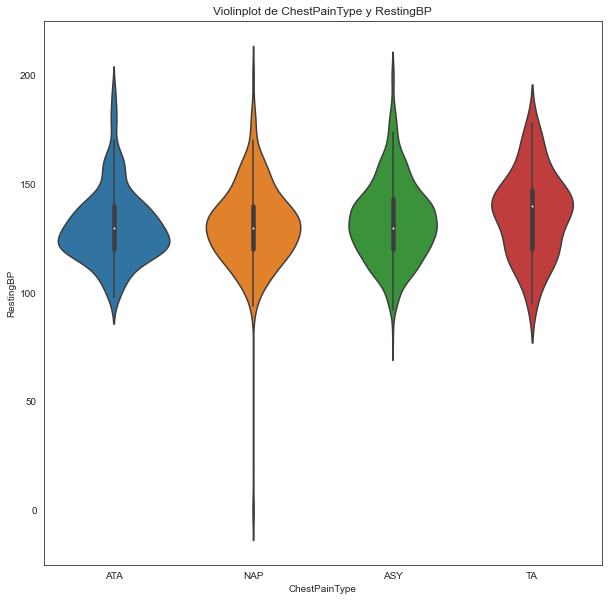

In [38]:
plt.figure(figsize=(10,10))
ax=sns.violinplot(data=df,x='ChestPainType',y='RestingBP')
ax.set_title('Violinplot de ChestPainType y RestingBP');

Al parecer el tipo de dolor de pecho no influye en la presion arterial de los pacientes, ya que los 4 violinplots son muy similares.

# 3. Análisis de datos.


### Correlación entre variables numéricas, mapas de calor y pairplots.

Obtenemos el dataframe con las variables numericas

In [74]:
df_numeric= df[['Age','Cholesterol','RestingBP','MaxHR','Oldpeak']]
df_numeric.head(5)

,Age,Cholesterol,RestingBP,MaxHR,Oldpeak
0,40,289,140,172,0.0
1,49,180,160,156,1.0
2,37,283,130,98,0.0
3,48,214,138,108,1.5
4,54,195,150,122,0.0


In [75]:
df_numeric.corr()

,Age,Cholesterol,RestingBP,MaxHR,Oldpeak
Age,1.000000,-0.095282,0.254399,-0.382045,0.258612
Cholesterol,-0.095282,1.000000,0.100893,0.235792,0.050148
RestingBP,0.254399,0.100893,1.000000,-0.112135,0.164803
MaxHR,-0.382045,0.235792,-0.112135,1.000000,-0.160691
Oldpeak,0.258612,0.050148,0.164803,-0.160691,1.000000


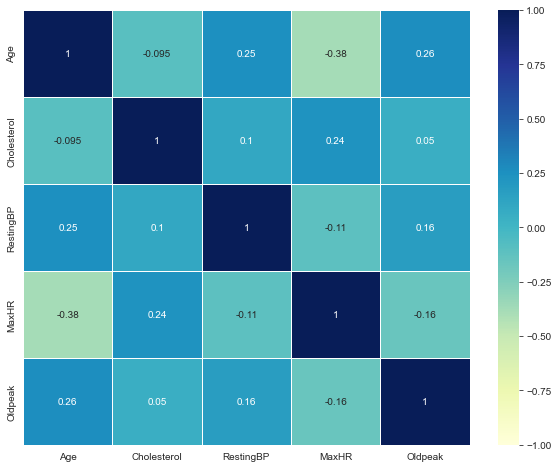

In [76]:
# Como la grafica no es muy atractiva visualmente, realizaremos un mapa de calor
plt.figure(figsize=(10, 8))
ax = sns.heatmap(df_numeric.corr(), # matriz de correlación 
                 vmin=-1, vmax=1, #valores máximos y mínimos de la correlación
                 annot=True,# coloca el valor de la correlación en cada cuadro
                 cmap="YlGnBu", # paleta de colores
                 linewidths=0.5 # grosor de la cuadrícula blanca
                );

Vemos que no hay correlaciones fuertes, ni positivas ni negativas.


Otra manera de visualizar la relación entre las variables es crear un pairplot, que nos ayuda a encontrar posibles relaciones entre variables.

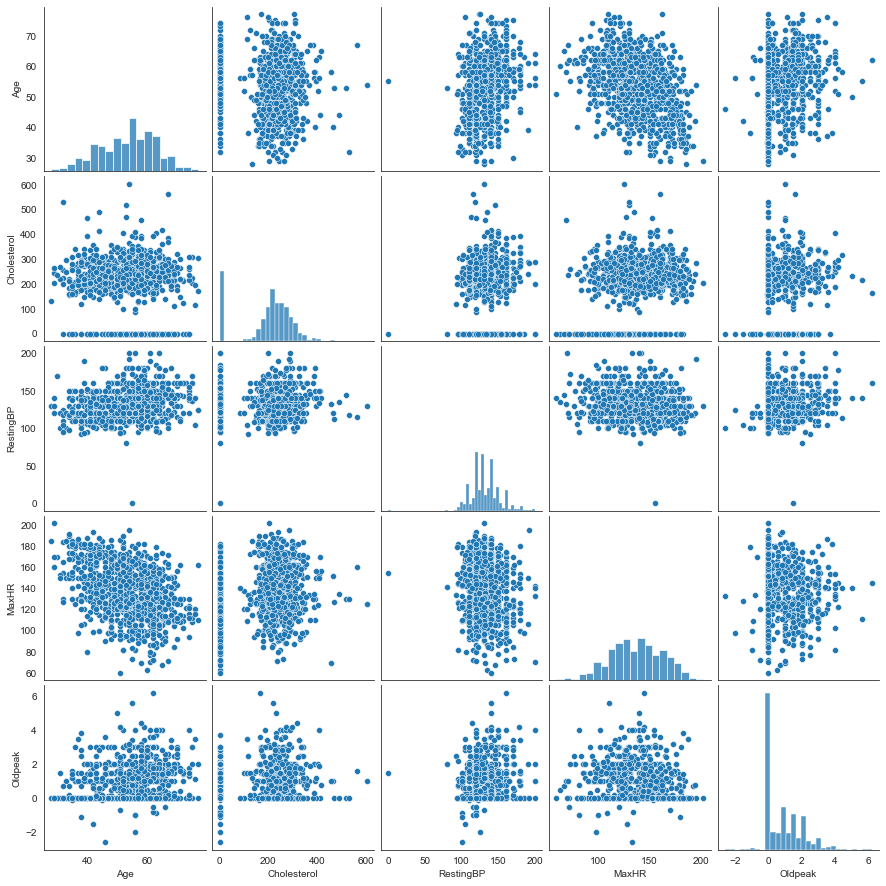

In [77]:
sns.pairplot(df_numeric); 

Considerando que un valor cero de colesterol y oldpeak son incorrectos, vamos a remover aquellos valores de la variable con valor igual a cero.

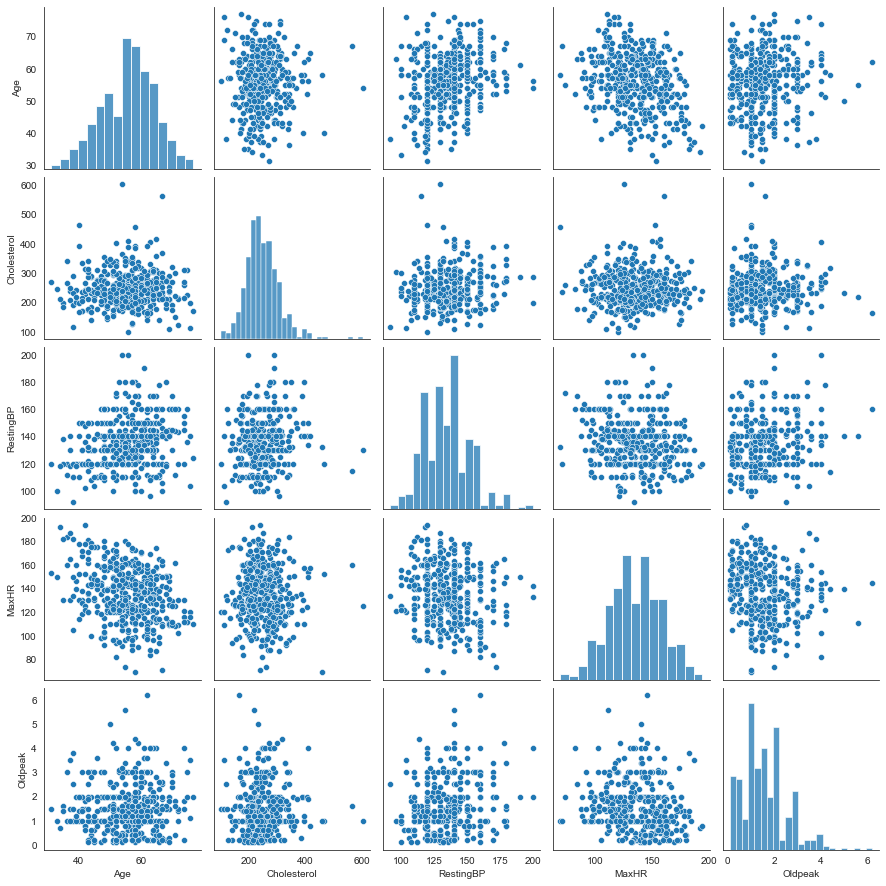

In [78]:
df_no_zeros=(df_numeric['Cholesterol']>0) & (df_numeric['Oldpeak']>0)
df_numeric=df_numeric[df_no_zeros]
sns.pairplot(df_numeric);

In [45]:
df_numeric.corr()

,Age,Cholesterol,RestingBP,MaxHR,Oldpeak
Age,1.000000,0.013596,0.225663,-0.282865,0.066119
Cholesterol,0.013596,1.000000,0.103234,-0.023355,0.009582
RestingBP,0.225663,0.103234,1.000000,-0.145679,0.170175
MaxHR,-0.282865,-0.023355,-0.145679,1.000000,-0.144427
Oldpeak,0.066119,0.009582,0.170175,-0.144427,1.000000


Vemos que la variable que sufrió un mayor impacto fue 'Oldpeak', debido a que quitamos los ceros. Sin embargo, la mayoria de las demas correlaciones no tuvo un cambio significativo.

## Regresion Lineal 

In [79]:
# importamos la libreria que nos ayudará a realizar la regresión lineal

from sklearn.linear_model import LinearRegression

In [47]:
# seleccionamos la columna x=Age y y=Oldpeak
x= df_numeric['Age']
y= df_numeric['Oldpeak']

In [48]:
lr= LinearRegression()
lr.fit(x.to_frame(),y)

LinearRegression()

In [49]:
y_predict=lr.predict(x.to_frame())

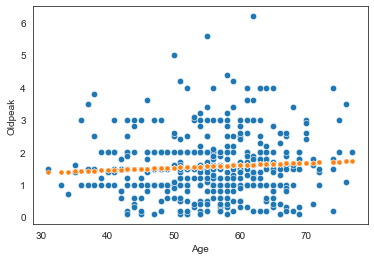

In [50]:
sns.scatterplot(x=x,y=y,s=40)
sns.scatterplot(x=x,y=y_predict,s=25);

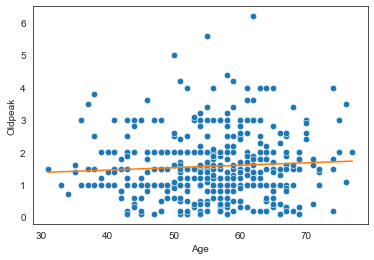

In [51]:
sns.scatterplot(x=x,y=y,s=40)
sns.lineplot(x=x,y=y_predict,color='#FF7F0E');

In [52]:
intercept = lr.intercept_
coefficient = lr.coef_[0]
print(f'y = {coefficient} * x + {intercept}')

y = 0.007492400408459602 * x + 1.153975132365701


In [53]:
# Ahora calculamos el valor de determinacion
print(f'R2: {lr.score(x.to_frame(), y)}')

R2: 0.004371675998074642


Regresion lineal entre MaxHR y Age

In [54]:
x= df_numeric['MaxHR']
y= df_numeric['Age']

In [55]:
lr = LinearRegression()
lr.fit(x.to_frame(),y)

LinearRegression()

In [56]:
y_predict= lr.predict(x.to_frame())

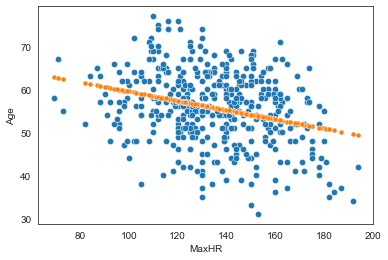

In [57]:
sns.scatterplot(x=x,y=y,s=40)
sns.scatterplot(x=x,y=y_predict,s=25);

In [58]:
intercept = lr.intercept_
coefficent = lr.coef_[0]
print(f'y=  {coefficent}*x + {intercept}')


y=  -0.10758469851104133*x + 70.2477633172068


In [59]:
print(f'R2:{lr.score(x.to_frame(),y)}')

R2:0.08001253557298749


Ninguna de las dos regresiones aplicadas es un buen modelo para describir la relacion entre las variables seleccionadas

### En esta parte vamos a usar la técnica de Bootstrap para reducir los posibles sesgos de nuestras variables numéricas.

Trabajarermos con las variables 'Age', 'Cholesterol', 'RestingBP', 'MaxHR' y 'Oldpeak'

In [60]:
### Age

age= df['Age']

medias = []

for ii in range(918): #918 es el número de registros
    sample = age.sample(500,replace=True)
    medias.append(sample.mean())
serie_medias_age = pd.Series(medias)


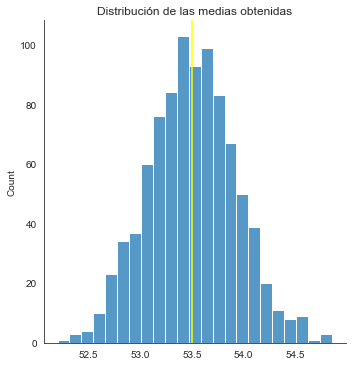

In [61]:
sns.set_style('white')
ax=sns.displot(serie_medias_age,kde=False)
plt.title('Distribución de las medias obtenidas');
plt.axvline(serie_medias_age.mean(),color='yellow');


In [62]:
df['Age'].mean()

53.510893246187365

In [63]:
print(f'Error estandar: {serie_medias_age.std()}')

Error estandar: 0.42507378399067075


In [64]:
# obtenemos el rango para una mejor interpretacion del error estandar
print(f'Valor mínimo: {serie_medias_age.min()}')
print(f'Valor máximo: {serie_medias_age.max()}')
print(f'Rango: {serie_medias_age.max() - serie_medias_age.min()}')

Valor mínimo: 52.2
Valor máximo: 54.854
Rango: 2.6539999999999964


In [65]:
# suponiendo que queremos un 99% de de confianza, calculamos 
limite_inferior = serie_medias_age.quantile(0.005)
limite_superior = serie_medias_age.quantile(0.995)

In [66]:
print(f'Intervalo de 90% confianza de la media: {limite_inferior} < {age.mean()} < {limite_superior}')

Intervalo de 90% confianza de la media: 52.46136 < 53.510893246187365 < 54.59747


In [67]:
## simetría 
print(f'Asimetría: {serie_medias_age.skew()}')
print(f'Kurtosis: {serie_medias_age.kurtosis()}')

Asimetría: 0.07858900387857663
Kurtosis: -0.012311650419121634


Curtosis: -0.3905684960842244
Asimetría: -0.19561273124487544


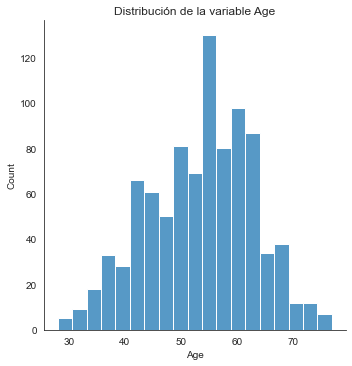

In [68]:
# comparando con la columna Age
sns.set_style('white')
sns.displot(df['Age'],kde=False)
plt.title('Distribución de la variable Age')
age_arr=np.array(df['Age']) 

print(f'Curtosis: {kurtosis(age_arr)}')
print(f'Asimetría: {skew(age_arr)}')


Vemos que la media está muy cercana de la media obtenida a partir del bootstrap, por lo que podemos concluir que los datos practicamente no tienen sesgos

In [69]:
### Cholesterol

colesterol= df['Cholesterol']

medias = []

for ii in range(918): #918 es el número de registros
    sample = colesterol.sample(50,replace=True)
    medias.append(sample.mean())
serie_medias_col = pd.Series(medias)


Asimetría: -0.20093395068364894
Kurtosis: -0.28271976821567435


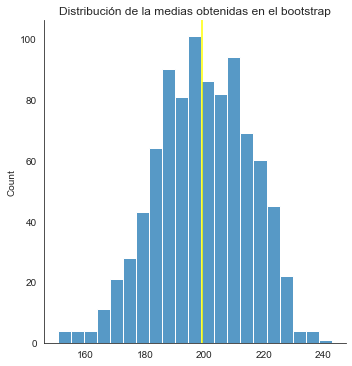

In [70]:
ax = sns.displot(serie_medias_col, kde=False)
plt.title('Distribución de la medias obtenidas en el bootstrap')
plt.axvline(serie_medias_col.mean(),color='yellow')

print(f'Asimetría: {serie_medias_col.skew()}')
print(f'Kurtosis: {serie_medias_col.kurtosis()}');

In [71]:
df['Cholesterol'].mean()

198.7995642701525

In [72]:
print(f'Error estandar: {serie_medias_col.std()}')

Error estandar: 15.566372391752253


In [73]:
# obtenemos el rango para una mejor interpretacion del error estandar
print(f'Valor mínimo: {serie_medias_col.min()}')
print(f'Valor máximo: {serie_medias_col.max()}')
print(f'Rango: {serie_medias_col.max() - serie_medias_col.min()}')

Valor mínimo: 150.66
Valor máximo: 242.82
Rango: 92.16


In [74]:
# suponiendo que queremos un 90% de de confienza, calculamos 
limite_inferior = serie_medias_col.quantile(0.05)
limite_superior = serie_medias_col.quantile(0.95)

In [75]:
print(f'Intervalo de 90% confianza de la media: {limite_inferior} < {colesterol.mean()} < {limite_superior}')

Intervalo de 90% confianza de la media: 173.157 < 198.7995642701525 < 223.387


Curtosis: 0.11103677697582448
Asimetría: -0.6090891046626045


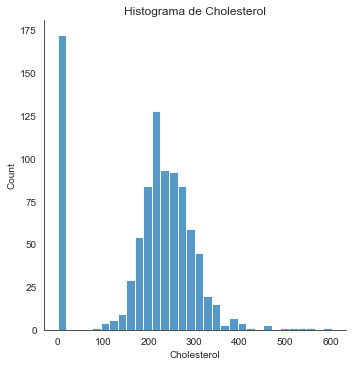

In [76]:
# comparando con la variable Cholesterol 
sns.set_style('white')
ax= sns.displot(df['Cholesterol'],kde=False)
plt.title('Histograma de Cholesterol');
arr=np.array(df['Cholesterol']) 

print(f'Curtosis: {kurtosis(arr)}')
print(f'Asimetría: {skew(arr)}')


Vemos que la media está muy cercana de la media obtenida a partir del bootstrap, por lo que podemos concluir que los datos practicamente no tienen sesgos. Por otro lado, en este caso es más evidente que el bootstrap suavizó los ceros de la variable Cholesterol.

In [77]:
#### MaxHR

max_hr= df['MaxHR']

medias = []

for ii in range(918): #918 es el número de registros
    sample = max_hr.sample(500,replace=True)
    medias.append(sample.mean())
serie_medias_hr = pd.Series(medias)


Asimetría: -0.05343463288048915
Kurtosis: 0.04039135193083032


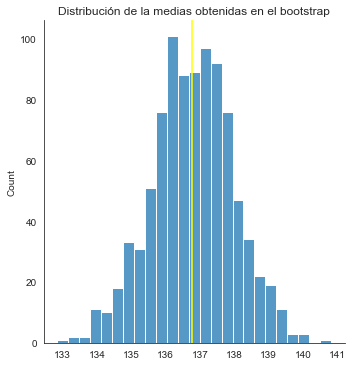

In [78]:
sns.displot(serie_medias_hr, kde=False)
plt.title('Distribución de la medias obtenidas en el bootstrap')
plt.axvline(serie_medias_hr.mean(),color='yellow')

print(f'Asimetría: {serie_medias_hr.skew()}')
print(f'Kurtosis: {serie_medias_hr.kurtosis()}')

In [79]:
df['MaxHR'].mean()

136.80936819172112

In [80]:
print(f'Error estandar: {serie_medias_hr.std()}')

Error estandar: 1.183878702439543


Para poder interpretar mejor el error estandar, obtenemos el rango

In [81]:
print(f'Valor mínimo: {serie_medias_hr.min()}')
print(f'Valor máximo: {serie_medias_hr.max()}')
print(f'Rango: {serie_medias_hr.max() - serie_medias_hr.min()}')

Valor mínimo: 132.846
Valor máximo: 140.812
Rango: 7.966000000000008


Suponiendo que necesitamos un 95% de confianza, calculamos el intervalo correspondiente

In [82]:
limite_inferior = serie_medias_hr.quantile(0.025)
limite_superior = serie_medias_hr.quantile(0.975)

In [83]:
print(f'Intervalo de 95% confianza de la media: {limite_inferior} < {max_hr.mean()} < {limite_superior}')

Intervalo de 95% confianza de la media: 134.40465 < 136.80936819172112 < 139.0695


Curtosis: -0.4523389391469048
Asimetría: -0.14412342991429325


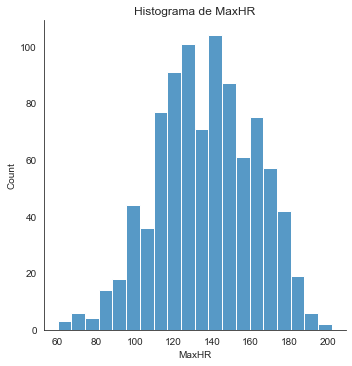

In [84]:
# comparando con la variable MaxHR 
sns.set_style('white')
ax= sns.displot(df['MaxHR'],kde=False)
plt.title('Histograma de MaxHR');
arr=np.array(df['MaxHR']) 

print(f'Curtosis: {kurtosis(arr)}')
print(f'Asimetría: {skew(arr)}')


Como la distribución de las medias a partir del boottrap son muy parecidas a una normal, entonces concluimos que la variable MaxHR no tiene sesgos significativos.

## Regresión lineal múltiple 

Debido a que la regresion lineal simple no tuvo los resultados esperados, se usará una regresión lineal múltiple. Además se usará el método de validación cruzada para tener un resultado más representativo.

In [85]:
#Verificamos  que no tengamos NaN´s
df.isna().sum()

Age               0
Sex               0
ChestPainType     0
RestingBP         0
Cholesterol       0
FastingBS         0
RestingECG        0
MaxHR             0
ExerciseAngina    0
Oldpeak           0
ST_Slope          0
HeartDisease      0
dtype: int64

In [86]:
# Nuestras variables numericas son 'Age', 'Cholesterol', 'RestingBP', 'MaxHR' y 'Oldpeak'
# deinimos nuestra variable dependiente y nuestras variables independientes
# usaremos los datos que habiamos limpiado anteriormente denotados como df_numeric

X = df_numeric[['Age','RestingBP','Cholesterol']] # independientes 
y = df_numeric['MaxHR']             # dependiente

In [87]:
from sklearn.model_selection import train_test_split

In [88]:
# Nota el tamaño del dataset de prueba (30% del total) y que estamos revolviendo el dataset 
# aleatoriamente antes de realizar la división.

X_training, X_test, y_training, y_test = train_test_split(X, y, test_size=0.3, shuffle=True)

In [89]:
from sklearn.linear_model import LinearRegression

In [90]:
lr = LinearRegression()
lr.fit(X_training, y_training)

LinearRegression()

In [91]:
# obtenemos el coeficiente de determinación
lr.score(X_test, y_test)

-0.02155298019028673

In [92]:
# Usando nuestro modelo entrenado, usamos de nuevo nuestra variable `X` para intentar predecir `y`:
y_predict = lr.predict(X)

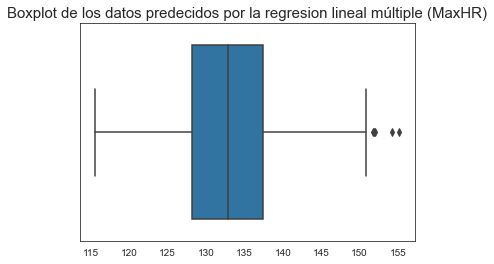

In [93]:
sns.boxplot(x=y_predict)
plt.title('Boxplot de los datos predecidos por la regresion lineal múltiple (MaxHR)',size=15);

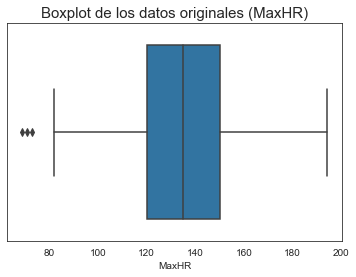

In [94]:
sns.boxplot(x=y)
plt.title('Boxplot de los datos originales (MaxHR)',size=15);

In [95]:
from sklearn.model_selection import cross_validate # paquetería para la validación cruzada
from sklearn.linear_model import LinearRegression # paquetería para la regresion lineal

lr = LinearRegression()

In [96]:
scores = cross_validate(lr,X,y,scoring='r2',cv=10) #indicamos que obtendremos el valor de determinación, k=10 (cv=10)
scores
# test_score contiene a las R2

{'fit_time': array([0.00800133, 0.00800347, 0.00399971, 0.00400066, 0.00400472,
        0.00400376, 0.00399637, 0.00400281, 0.00399995, 0.00400162]),
 'score_time': array([0.00400066, 0.00400186, 0.00400138, 0.00400281, 0.00400114,
        0.        , 0.        , 0.        , 0.        , 0.        ]),
 'test_score': array([-0.1459184 , -0.1715503 , -0.01836545, -0.17160856, -0.02826253,
         0.07884828,  0.06918722, -0.04503724, -0.3604871 , -0.51785038])}

Obtenemos la evaluación del modelo usando el promedio y la desviación estándar de los scores obtenidos:

In [97]:
print(f'Score del modelo: {scores["test_score"].mean():.3f} +/- {scores["test_score"].std():.3f}')

Score del modelo: -0.131 +/- 0.179


Se estuvo jugando con las variables a considerar en la regresión lineal múltiple, el resultado que se muestra es el mejor que se pudo obtener. Se esperaba que el modelo de regresión lineal múltiple fuera mejor que el de regresión lineal, pero no fue así.

## Regresión Logística.

Usaremos el método de regresión logística para poder clasificar si un paciente puede sufrir una deficiencia cardiaca o no.

Separaremos nuestro dataframe original en dos partes, la primera la denotaremos como la variable X y tendrá únicamente variables numéricas. Por otro lado, la variable y será la variable booleana HeartDisease

In [127]:
# Primero tenemos que quitar los valores que creemos que están equivocados.

df_no_zeros=df['Cholesterol']>0
df=df[df_no_zeros]

In [128]:
# como estaremos trabajando unicamente con variables numericas, eliminaremos nuestras variables no-numericas
df = df.drop(columns=['ChestPainType', 'Sex','FastingBS', 'RestingECG','ExerciseAngina','Oldpeak','ST_Slope' ])

In [129]:
# Separamos nuestro dataset

X = df.drop(columns=['HeartDisease']) # variables independientes
y = df['HeartDisease'] # variable que nos interesa

In [130]:
X

,Age,RestingBP,Cholesterol,MaxHR
0,40,140,289,172
1,49,160,180,156
2,37,130,283,98
3,48,138,214,108
4,54,150,195,122
...,...,...,...,...
913,45,110,264,132
914,68,144,193,141
915,57,130,131,115
916,57,130,236,174


In [131]:
# importamos las paqueterías para la regresion logística y para separar nuestros datos
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split

In [132]:
# separamos el 30% de nuestros datos para prueba y el 70% para entrenamiento 
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3)

In [133]:
X_train

,Age,RestingBP,Cholesterol,MaxHR
162,47,160,263,174
264,47,140,193,145
79,49,130,206,170
833,54,120,258,147
527,61,139,283,135
...,...,...,...,...
247,48,122,275,150
559,64,134,273,102
796,56,134,409,150
62,45,140,224,144


In [135]:
logreg = LogisticRegression()
logreg

LogisticRegression()

In [136]:
# hacemos el ajuste con nuestros datos de entrenamiento
logreg.fit(X_train, y_train)

LogisticRegression()

Ahora realiamos predicciones con nuestro modelo entrenado.

In [138]:
y_pred = logreg.predict(X_test)

y_pred

array([ True, False,  True,  True,  True, False,  True,  True, False,
       False, False, False,  True, False,  True, False, False,  True,
        True, False, False, False, False,  True,  True,  True,  True,
        True, False,  True, False, False, False, False, False, False,
       False, False,  True, False, False, False, False,  True, False,
        True,  True, False, False,  True, False, False, False, False,
       False,  True,  True,  True,  True, False, False,  True, False,
       False,  True,  True,  True,  True, False, False, False, False,
       False, False,  True,  True,  True, False,  True, False,  True,
       False,  True, False,  True, False,  True, False,  True,  True,
       False, False, False, False, False, False,  True,  True, False,
       False, False,  True, False, False, False,  True,  True,  True,
       False,  True,  True,  True,  True, False,  True, False, False,
       False, False, False,  True, False, False, False, False, False,
       False,  True,

Para saber si el modelo es bueno o malo usamos el siguiente comando

In [139]:
# mean accuracy

logreg.score(X_test, y_test)

0.6964285714285714

## Matriz de Confusión

In [140]:
# Importamos la paquetería necesaria 
from sklearn import metrics

In [142]:
cnf_matrix = metrics.confusion_matrix(y_test, y_pred)

cnf_matrix

array([[81, 27],
       [41, 75]], dtype=int64)

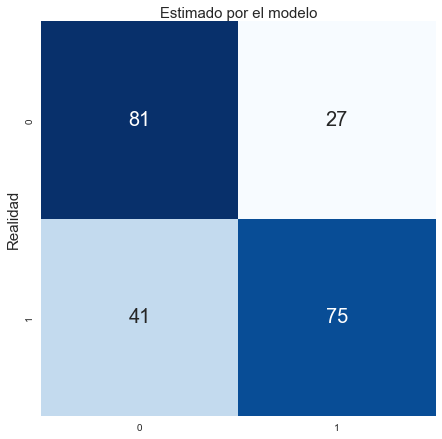

In [143]:
# como la matriz de arriba no es visualmente atractiva, realizaremos un gráfico que sí lo sea

class_names=[0,1] # nombre de las clases
fig, ax = plt.subplots(figsize=(6, 6))
tick_marks = np.arange(len(class_names))
plt.xticks(tick_marks, class_names)
plt.yticks(tick_marks, class_names)
# create heatmap
sns.heatmap(pd.DataFrame(cnf_matrix), annot=True, cmap="Blues" ,fmt='g', cbar=False, annot_kws={"size": 20})
ax.xaxis.set_label_position("top")
plt.tight_layout()
plt.ylabel('Realidad', fontsize=15, y=0.5)
plt.xlabel('Estimado por el modelo', fontsize=15);

In [144]:
tn, fp, fn, tp = cnf_matrix.ravel()

print("Precision:",metrics.precision_score(y_test, y_pred))
print("Exactitud:",metrics.accuracy_score(y_test, y_pred))
print("Sensibilidad:",metrics.recall_score(y_test, y_pred))
print("Especificidad:", tn / (tn + fp))

Precision: 0.7352941176470589
Exactitud: 0.6964285714285714
Sensibilidad: 0.646551724137931
Especificidad: 0.75


Vemos que nuestro modulo no es tan bueno, esto puede ser debido a que solo estamos trabajando con variables numéricas.

## Curva ROC/AUC

Para graficar una curva ROC / AUC necesitamos resultados probabilísticos

In [146]:
y_pred_proba = logreg.predict_proba(X_test)

y_pred_proba[:10,:]

array([[0.19070111, 0.80929889],
       [0.80266271, 0.19733729],
       [0.37824939, 0.62175061],
       [0.41706113, 0.58293887],
       [0.48285568, 0.51714432],
       [0.55452199, 0.44547801],
       [0.37703909, 0.62296091],
       [0.30657979, 0.69342021],
       [0.68779034, 0.31220966],
       [0.54340797, 0.45659203]])

El primer valor es la probabilidad de que el valor sea negativo. El segundo valor es la probabilidad de que el valor sea positivo. Necesitamos los resultados de esta manera para poder modificar el umbral y obtener los puntos necesarios para generar la curva ROC.

In [147]:
from sklearn.metrics import roc_curve, auc

In [148]:
fpr, tpr, _ = roc_curve(y_test, y_pred_proba[:, 1])
roc_auc = auc(fpr, tpr)

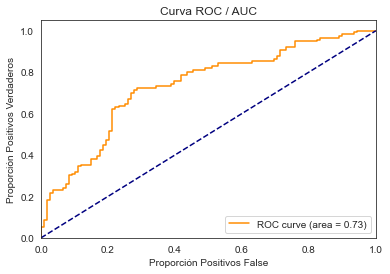

In [149]:
plt.figure()
plt.plot(fpr, tpr, color='darkorange',
         label='ROC curve (area = %0.2f)' % roc_auc)
plt.plot([0, 1], [0, 1], color='navy', linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('Proporción Positivos False')
plt.ylabel('Proporción Positivos Verdaderos')
plt.title('Curva ROC / AUC')
plt.legend(loc="lower right")
plt.show()

Obtuvimos un valor de 0.73, entre más cerca a 1 se encuentre significa que nuestro modelo puede diferenciar casi a la perfección entre negativos y positivos, y que además es muy probable que elija la clasificación correcta.

## Conclusiones

1. El modelo de regresión lineal y lineal múltiple no fueron tan buenos como se esperaba, debido a la baja correlación entre las variables numérica

2. La regresión logística tuvo un mejor resultado, pero sin llegar a ser tan bueno como se desearia, pues se tuvo una media de precision de 0.69

3. Se debería incluir las demás variables categóricas en el análisis.